# DIABETES Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score

In [ ]:
from sklearn.datasets import load_diabetes # to import the diabetes patients dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

# Create a DataFrame
df = pd.DataFrame(data, columns=diabetes.feature_names)
df['target'] = target

# Save the DataFrame as a CSV file
df.to_csv('diabetes_dataset.csv', index=False)


In [ ]:
diabetes.data.shape # feature matrix shape

(442, 10)

In [ ]:
diabetes.target.shape # target vector shape

(442,)

In [ ]:
diabetes.feature_names # column names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
df = df.rename(columns={'s1': 'tc', 's2': 'ldl','s3': 'hdl','s4': 'tch','s5': 'ltg','s6': 'glu'})

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu',
       'target'],
      dtype='object')

In [ ]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.shape

(442, 11)

In [ ]:
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
df.nunique()

age        58
sex         2
bmi       163
bp        100
tc        141
ldl       302
hdl        63
tch        66
ltg       184
glu        56
target    214
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

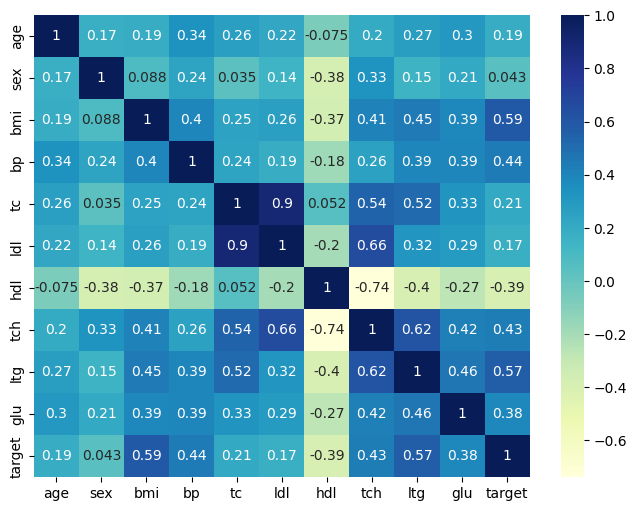

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

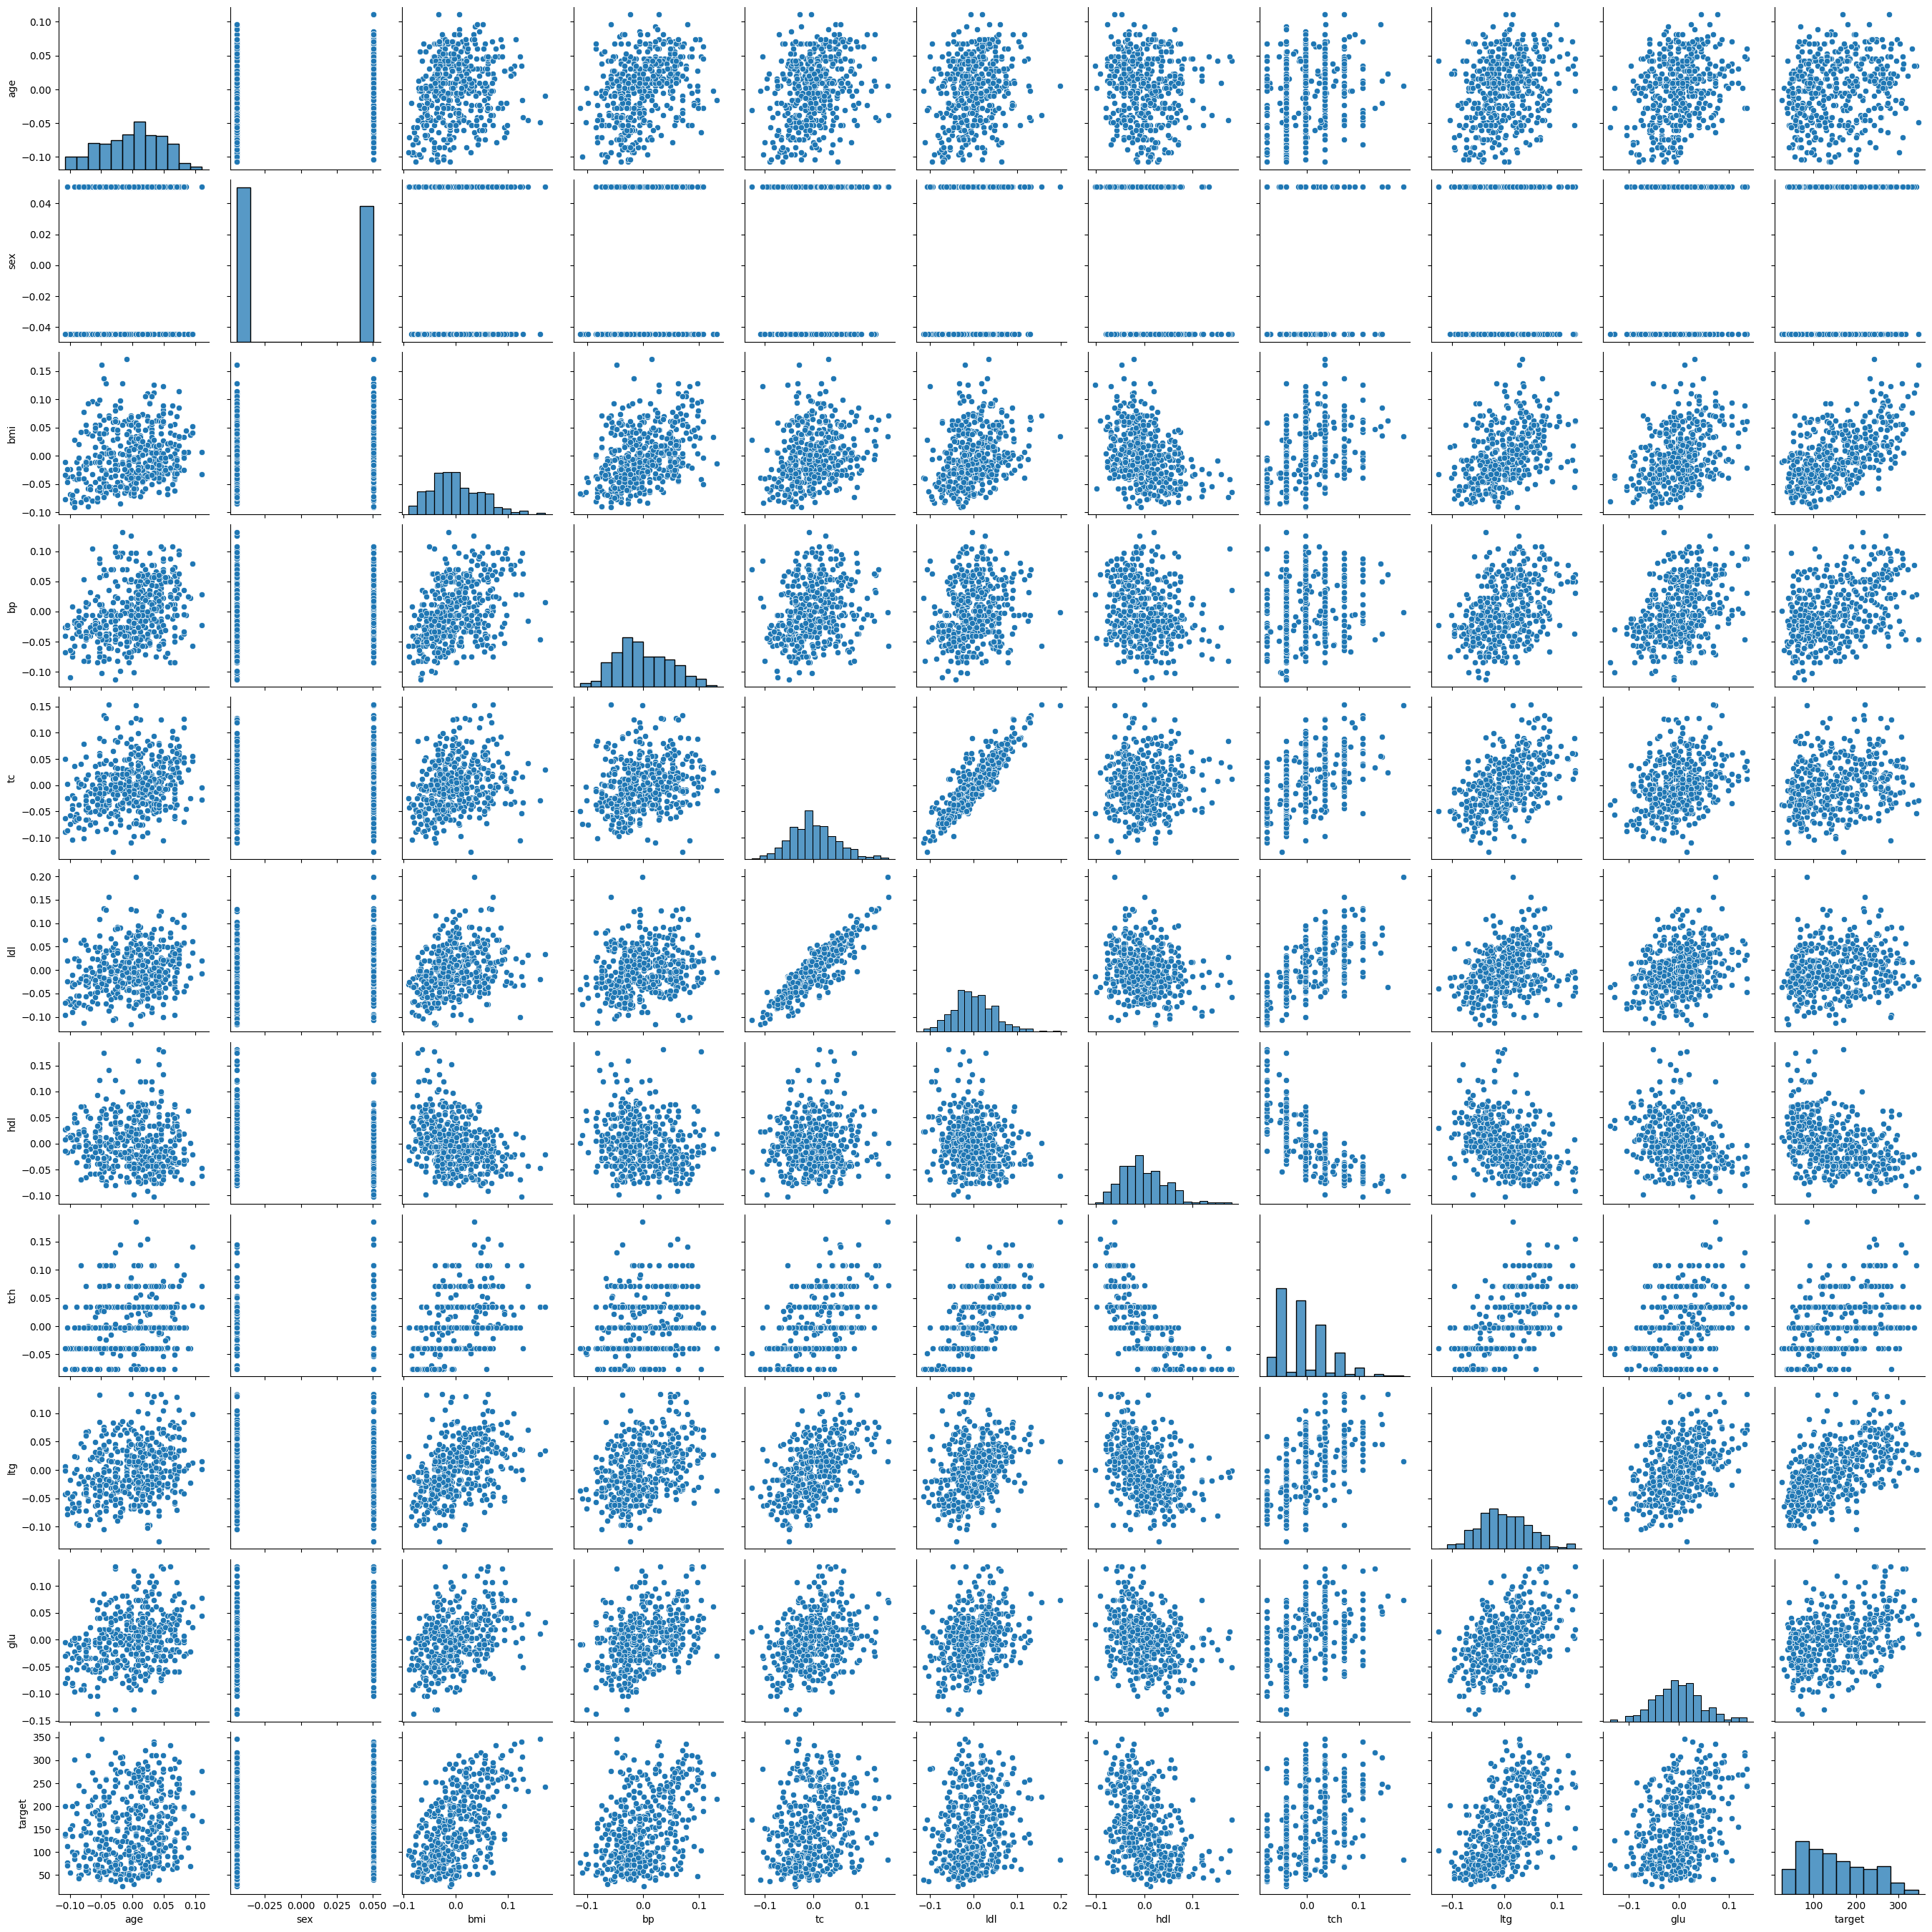

In [ ]:
sns.pairplot(df)

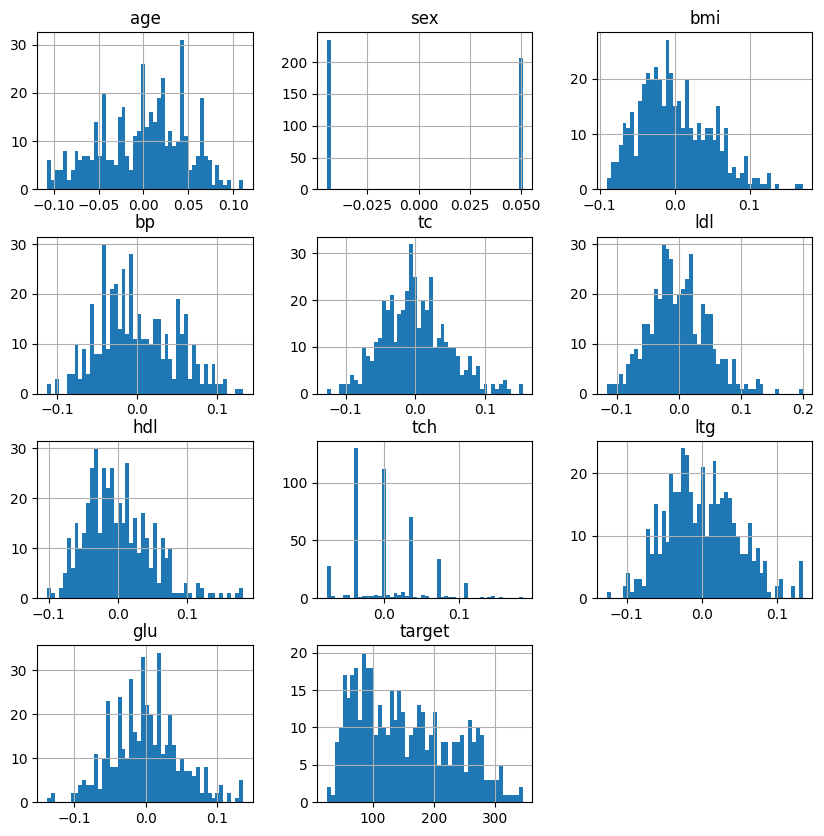

In [ ]:
df.hist(bins = 50 , figsize=(10,10))
plt.show()

In [ ]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

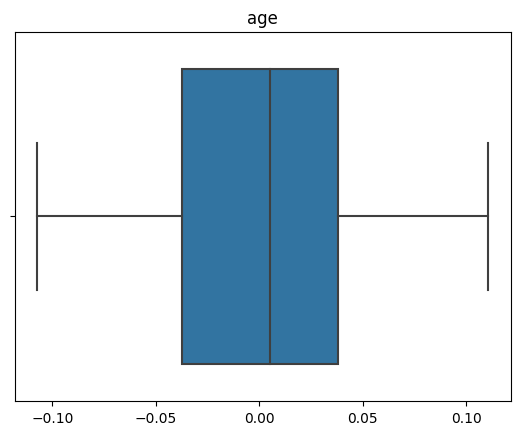

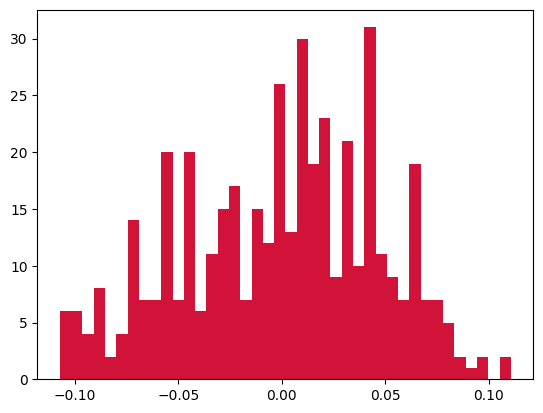

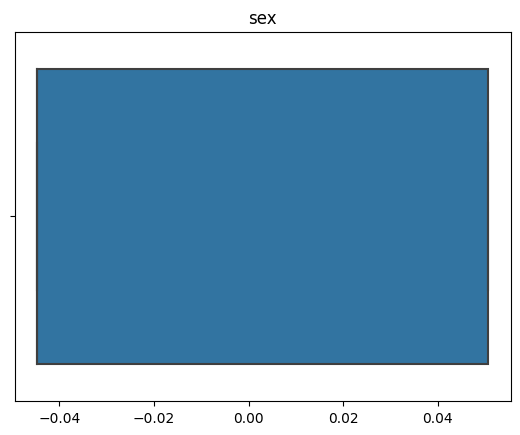

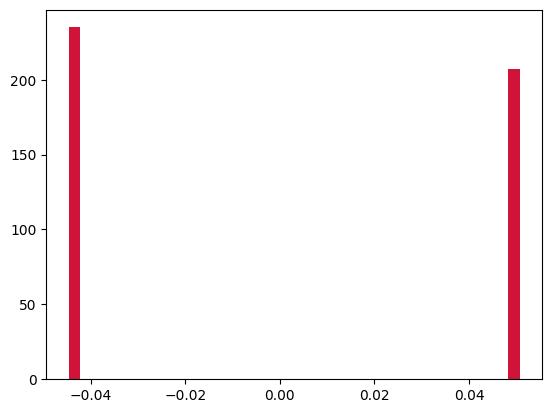

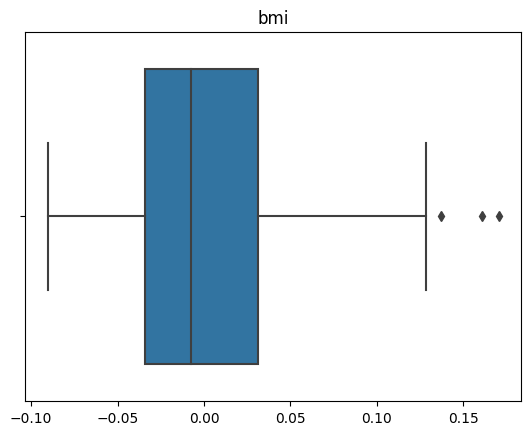

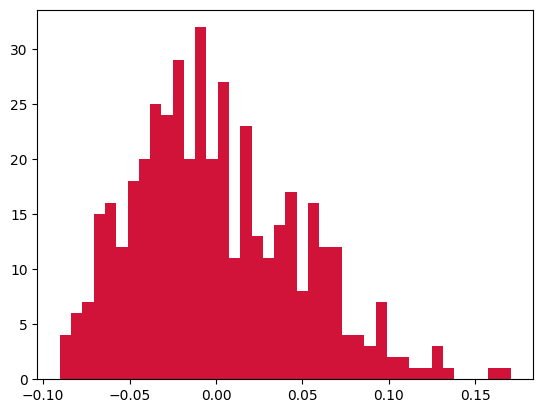

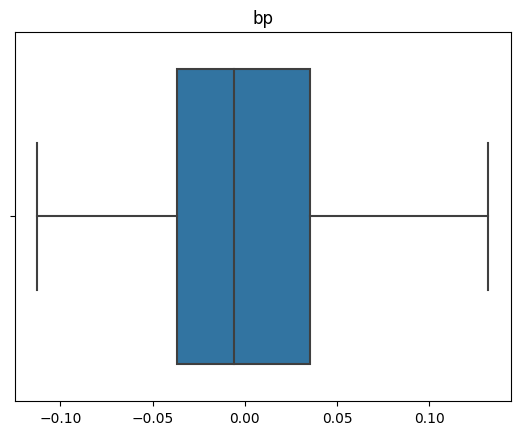

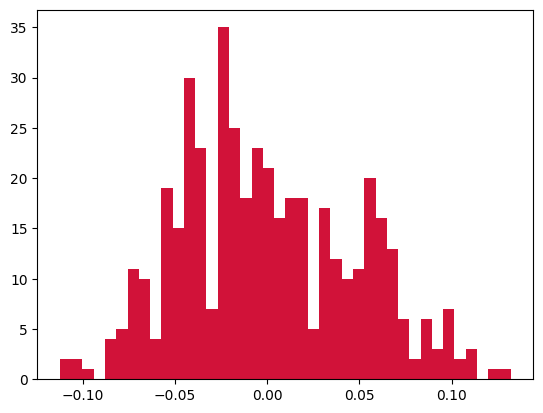

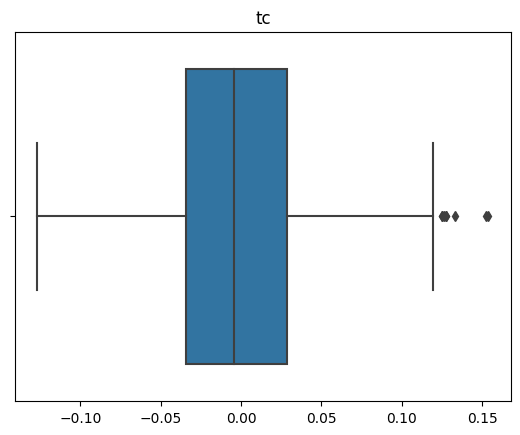

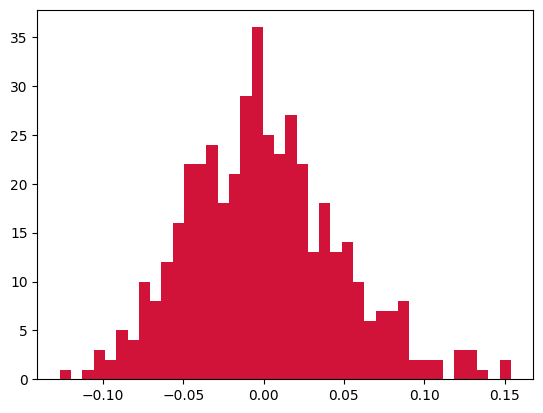

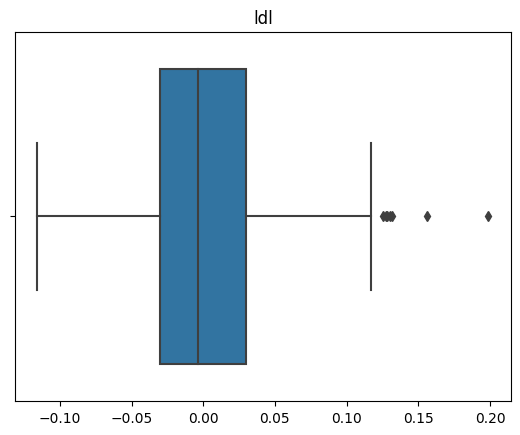

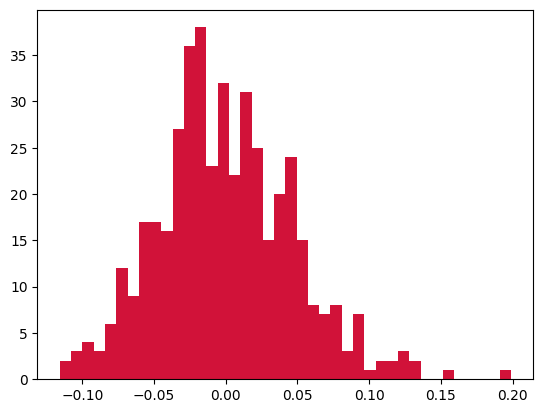

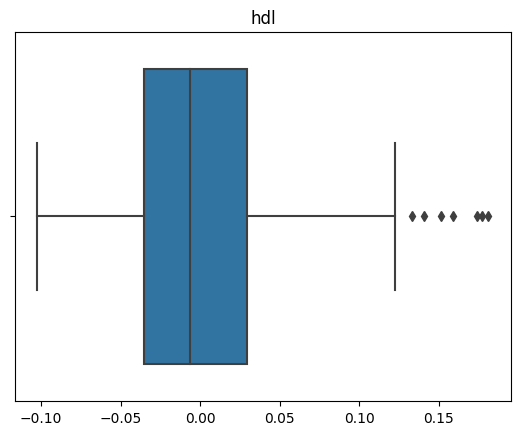

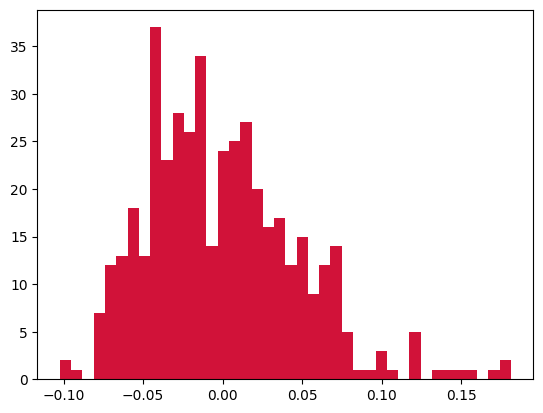

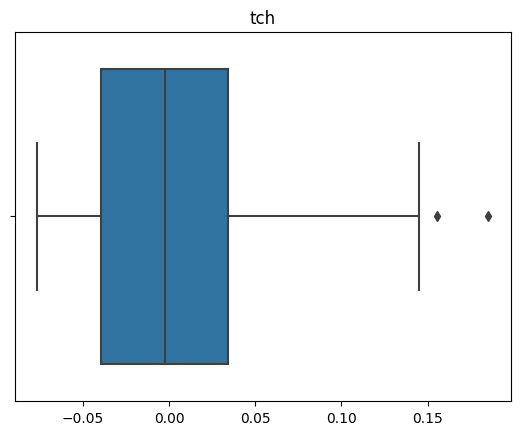

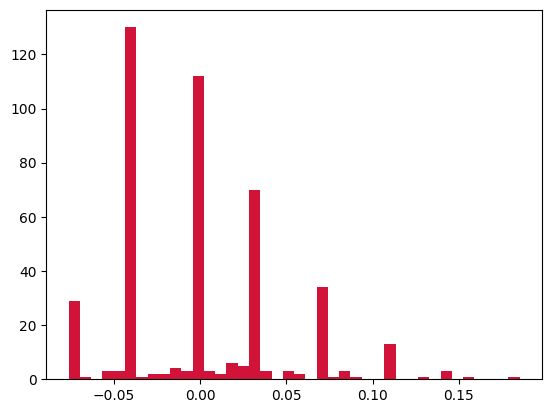

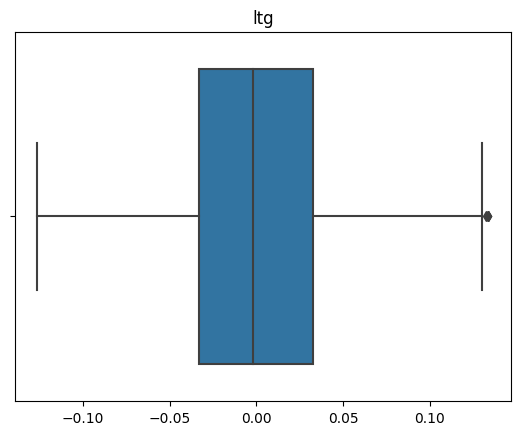

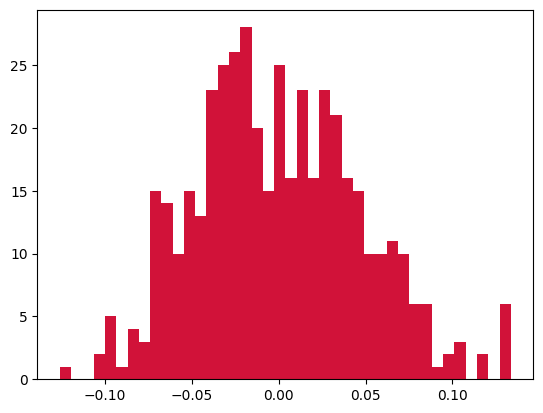

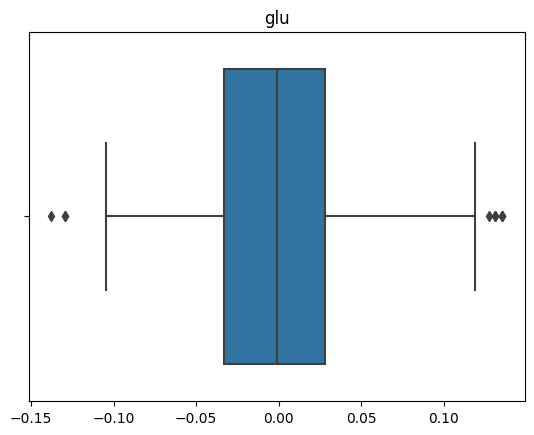

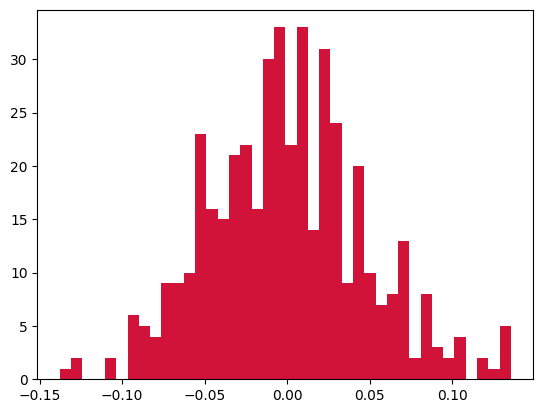

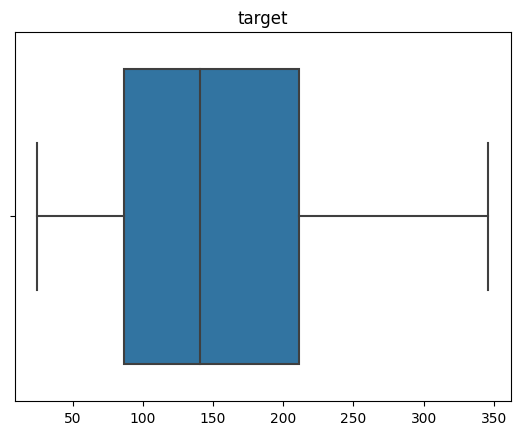

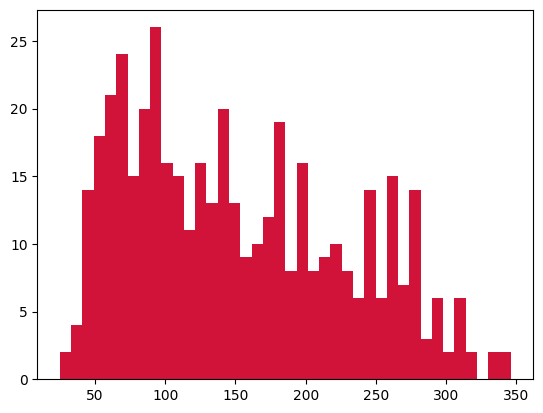

In [ ]:
# loop over all the columns and draw outliers
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(y_train.values).float()
X_val = torch.from_numpy(X_val.values).float()
y_val = torch.from_numpy(y_val.values).float()

# MLP MODEL

In [ ]:
# Step 2: Define the MLP model
mlp_model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

The code you provided is defining a Multi-Layer Perceptron (MLP) model using PyTorch's `nn.Sequential` module. Let's break down the code to understand each part:

1. `nn.Sequential`: This is a container module that allows you to define a sequential neural network by specifying each layer in order. The output of one layer is fed as input to the next layer.

2. `nn.Linear(10, 64)`: This is the first linear layer, also known as a fully connected layer. It takes an input size of 10 and produces an output size of 64. The `nn.Linear` module represents a linear transformation, and it is followed by a ReLU activation function (`nn.ReLU()`).

3. `nn.ReLU()`: This is the Rectified Linear Unit (ReLU) activation function. It introduces non-linearity to the model by applying the element-wise rectified linear function to the output of the previous layer.

4. `nn.Linear(64, 32)`: This is the second linear layer. It takes the output from the previous layer (which had 64 units) and produces an output of size 32. Again, it is followed by a ReLU activation.

5. `nn.Linear(32, 1)`: This is the final linear layer. It takes the output from the previous layer (which had 32 units) and produces a single output. There is no activation function after this layer, suggesting that this MLP is used for regression tasks where the output is a continuous value.

In summary, the provided code defines a simple MLP architecture with two hidden layers (64 units and 32 units) and a single output layer (1 unit). The ReLU activation function is used between the linear layers to introduce non-linearity. This architecture is commonly used for regression tasks.

In [ ]:
# Step 3: Define training configurations
lr_list = [0.001, 0.01, 0.1]
optimizers = [optim.SGD, optim.Adam, optim.RMSprop]

# Lists to store losses for plotting
train_losses = []
val_losses = []

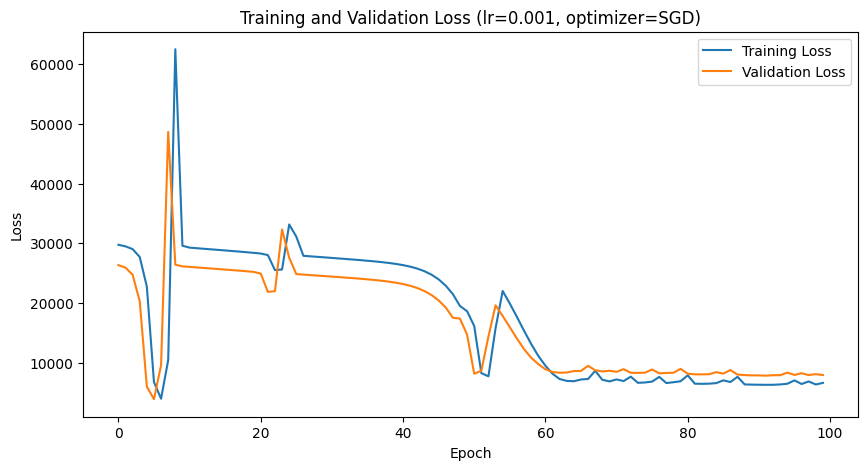

For lr=0.001 and optimizer=SGD, final training loss: 6583.98095703125, final validation loss: 7903.873046875


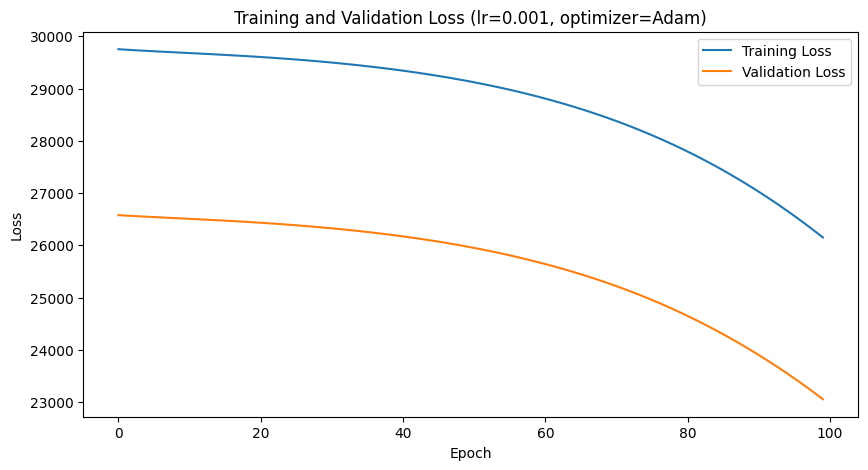

For lr=0.001 and optimizer=Adam, final training loss: 26150.251953125, final validation loss: 23055.310546875


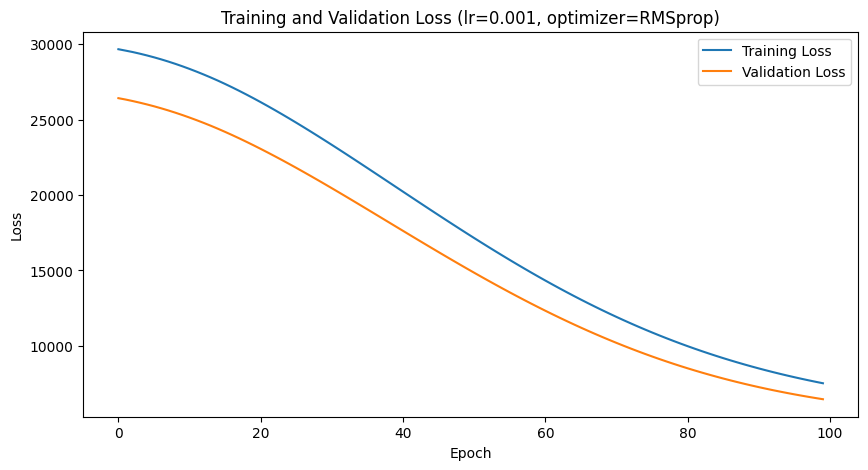

For lr=0.001 and optimizer=RMSprop, final training loss: 7523.130859375, final validation loss: 6464.7177734375


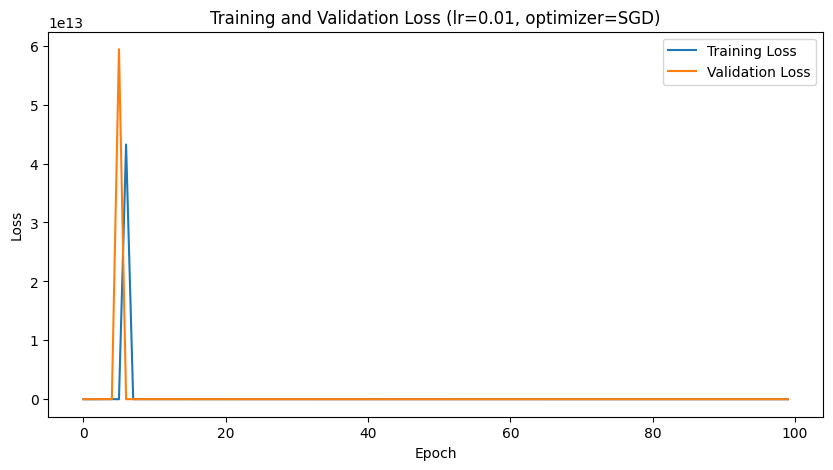

For lr=0.01 and optimizer=SGD, final training loss: 174896000.0, final validation loss: 167763296.0


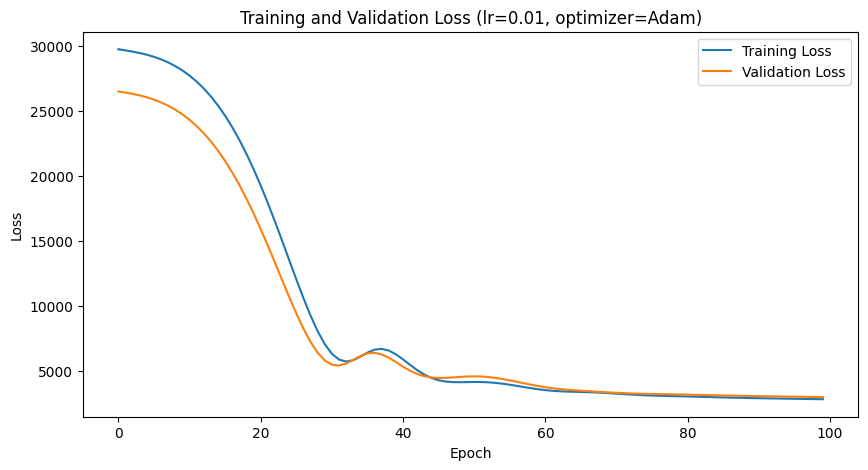

For lr=0.01 and optimizer=Adam, final training loss: 2828.623291015625, final validation loss: 2994.21337890625


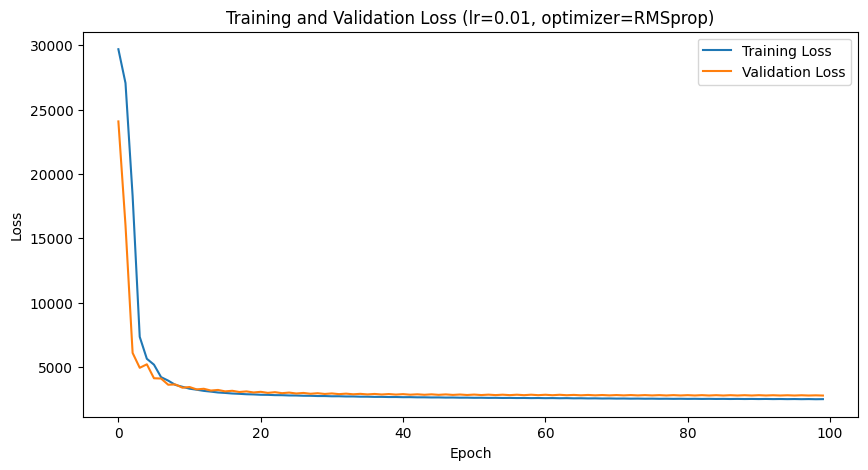

For lr=0.01 and optimizer=RMSprop, final training loss: 2499.665283203125, final validation loss: 2778.072998046875


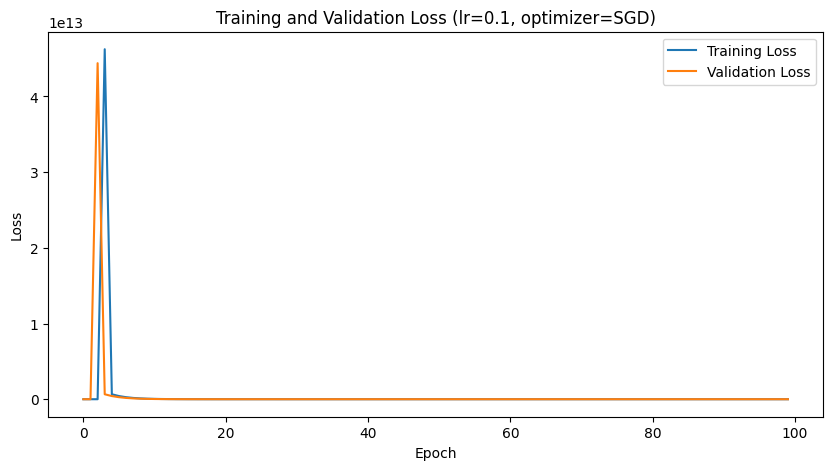

For lr=0.1 and optimizer=SGD, final training loss: 6076.39794921875, final validation loss: 5361.52685546875


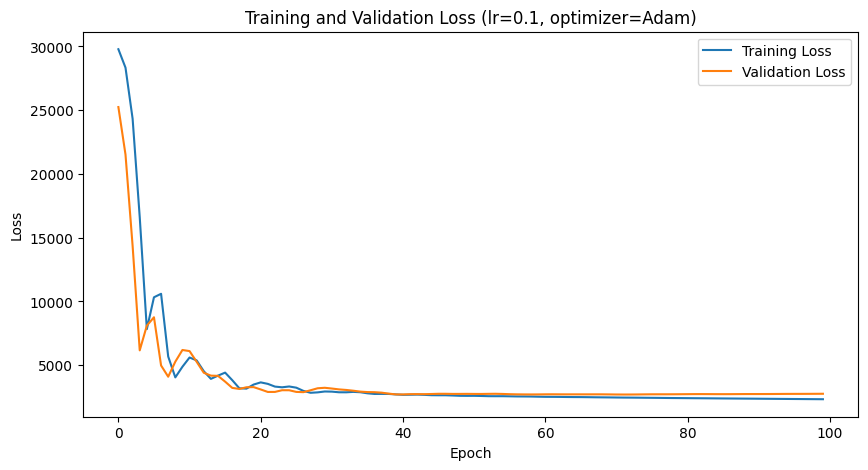

For lr=0.1 and optimizer=Adam, final training loss: 2334.81494140625, final validation loss: 2762.705810546875


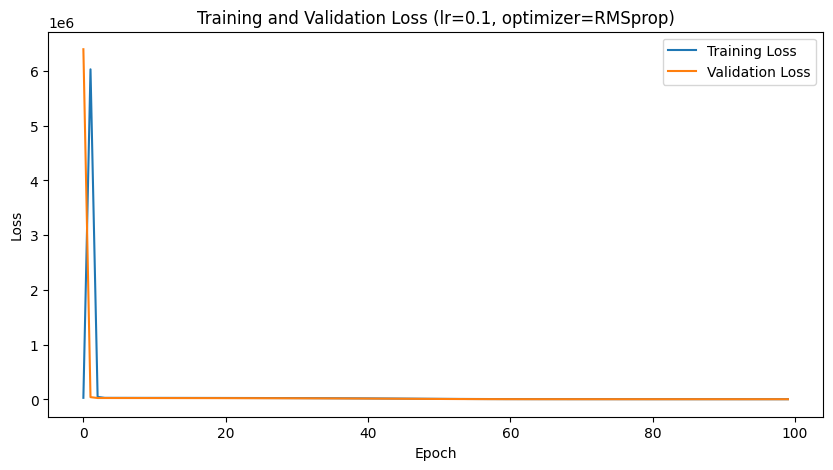

For lr=0.1 and optimizer=RMSprop, final training loss: 4556.90576171875, final validation loss: 4098.4970703125


In [ ]:
for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        writer = SummaryWriter(f'logs/lr_{lr}_optimizer_{optimizer_fn.__name__}') #Create a log writer to keep track of the training process. The log will be saved in a directory named based on the learning rate and optimizer.

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

            writer.add_scalar('Loss/train', loss, epoch)

            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                val_output = model(X_val)
                val_loss = criterion(val_output, y_val.view(-1, 1))

            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

        writer.close() #Close the log writer

        # Plot training and validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
        plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(f'Training and Validation Loss (lr={lr}, optimizer={optimizer_fn.__name__})')
        plt.show()

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"final training loss: {train_losses[-1]}, "
              f"final validation loss: {val_losses[-1]}")

        train_losses.clear()
        val_losses.clear()

In [ ]:
# Lists to store MSE and MAE
mse_list = []
mae_list = []

for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_output = model(X_val)
            mse = nn.MSELoss()(val_output, y_val.view(-1, 1))
            mae = nn.L1Loss()(val_output, y_val.view(-1, 1))

        mse_list.append(mse.item())
        mae_list.append(mae.item())

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"MSE: {mse.item()}, MAE: {mae.item()}")

# Print MSE and MAE for each combination of lr and optimizer
for i, (lr, optimizer) in enumerate(zip(lr_list, optimizers)):
    print(f"Learning Rate: {lr}, Optimizer: {optimizer.__name__}")
    print(f"MSE: {mse_list[i]}, MAE: {mae_list[i]}")

# Find the best model based on MSE
best_model_index = np.argmin(mse_list)
best_lr_index = best_model_index // len(optimizers)
best_optimizer_index = best_model_index % len(optimizers)

best_lr = lr_list[best_lr_index]
best_optimizer = optimizers[best_optimizer_index]

print(f"The best model has learning rate={best_lr} and optimizer={best_optimizer.__name__}")



For lr=0.001 and optimizer=SGD, MSE: 6173.52587890625, MAE: 65.1064224243164
For lr=0.001 and optimizer=Adam, MSE: 20924.953125, MAE: 127.08338928222656
For lr=0.001 and optimizer=RMSprop, MSE: 6306.33349609375, MAE: 60.351585388183594
For lr=0.01 and optimizer=SGD, MSE: 1.5886356030947328e+16, MAE: 126041088.0
For lr=0.01 and optimizer=Adam, MSE: 2904.7060546875, MAE: 43.837562561035156
For lr=0.01 and optimizer=RMSprop, MSE: 2763.533203125, MAE: 41.752357482910156
For lr=0.1 and optimizer=SGD, MSE: 5361.533203125, MAE: 64.00645446777344
For lr=0.1 and optimizer=Adam, MSE: 2644.257568359375, MAE: 39.97978210449219
For lr=0.1 and optimizer=RMSprop, MSE: 3075.79248046875, MAE: 43.31193542480469
Learning Rate: 0.001, Optimizer: SGD
MSE: 6173.52587890625, MAE: 65.1064224243164
Learning Rate: 0.01, Optimizer: Adam
MSE: 20924.953125, MAE: 127.08338928222656
Learning Rate: 0.1, Optimizer: RMSprop
MSE: 6306.33349609375, MAE: 60.351585388183594
The best model has learning rate=0.1 and optimize

# LINEAR REGRESSION

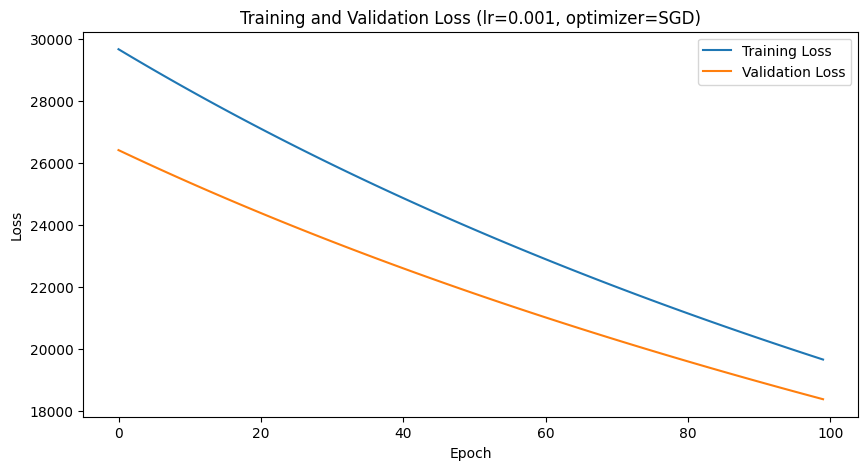

For lr=0.001 and optimizer=SGD, final training loss: 19651.658203125, final validation loss: 18370.798828125


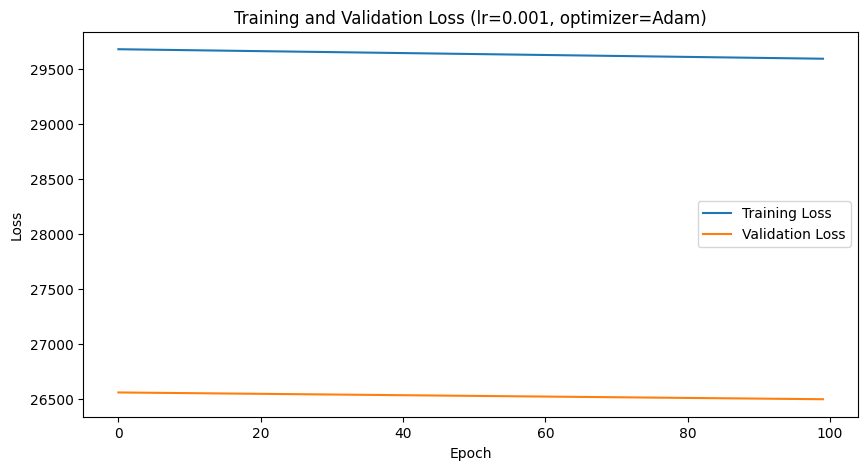

For lr=0.001 and optimizer=Adam, final training loss: 29592.779296875, final validation loss: 26494.6171875


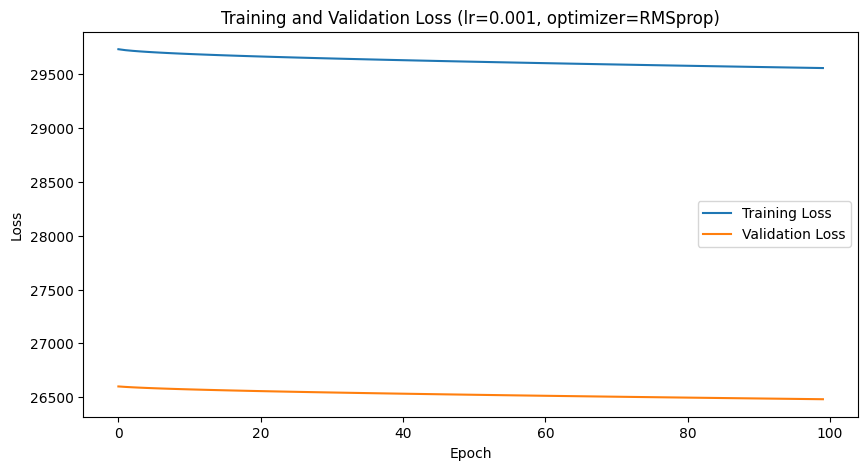

For lr=0.001 and optimizer=RMSprop, final training loss: 29558.115234375, final validation loss: 26480.6171875


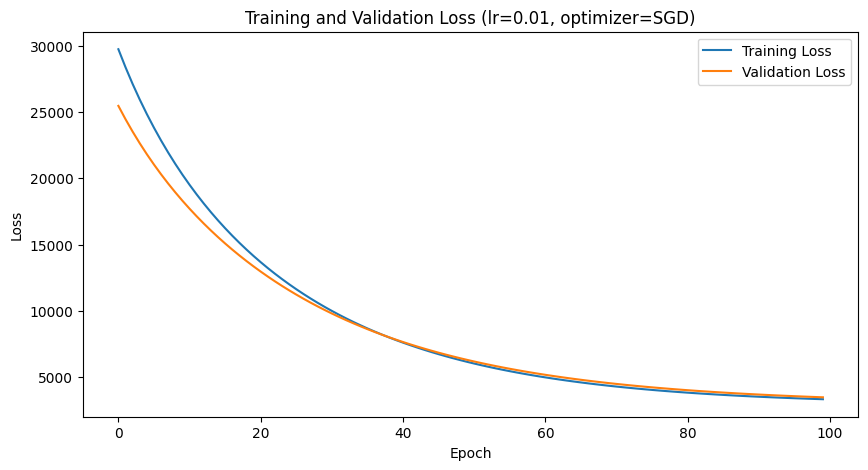

For lr=0.01 and optimizer=SGD, final training loss: 3330.976318359375, final validation loss: 3475.85986328125


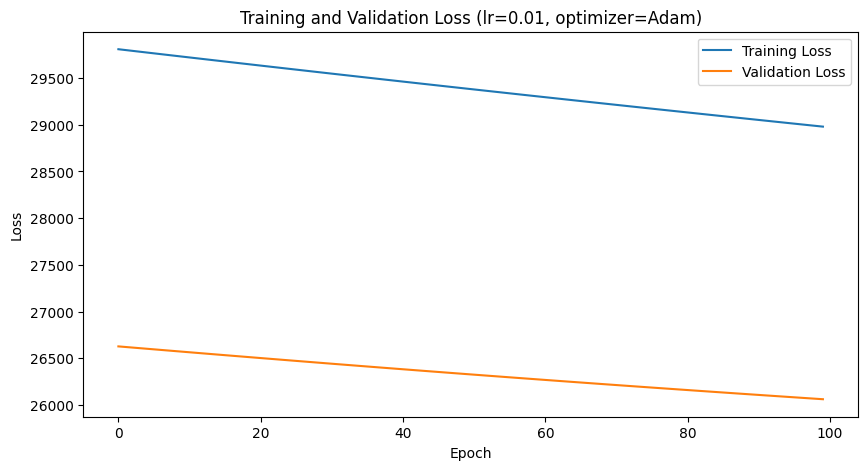

For lr=0.01 and optimizer=Adam, final training loss: 28980.275390625, final validation loss: 26060.986328125


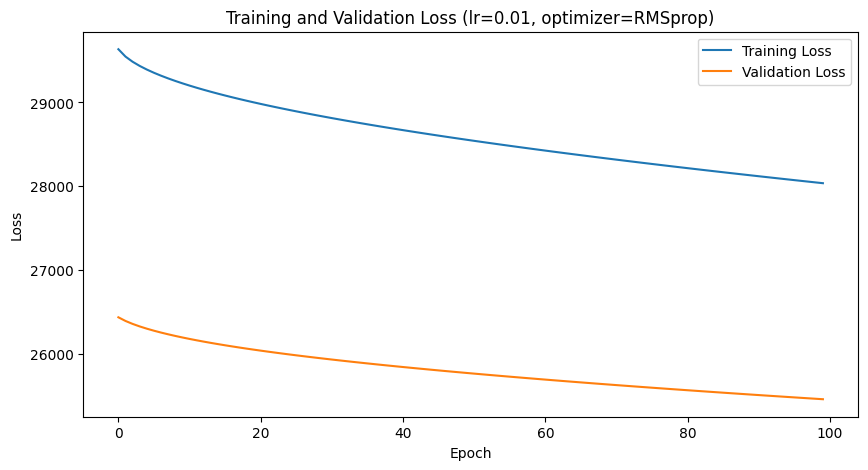

For lr=0.01 and optimizer=RMSprop, final training loss: 28036.78515625, final validation loss: 25460.427734375


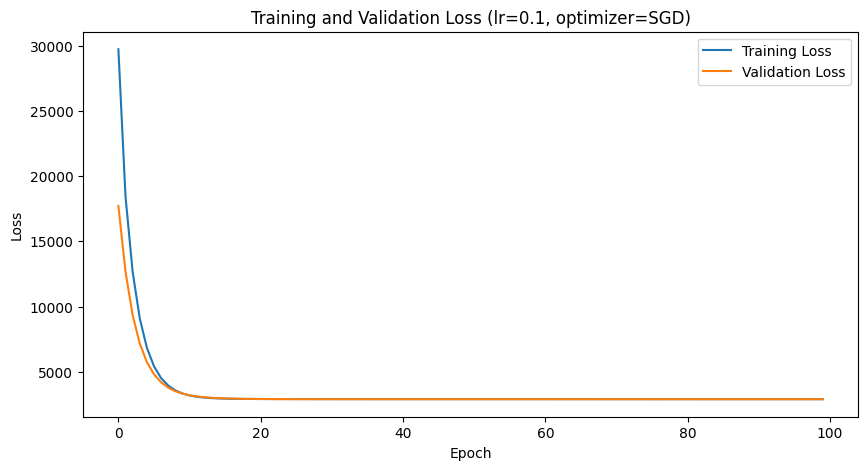

For lr=0.1 and optimizer=SGD, final training loss: 2890.168212890625, final validation loss: 2885.667236328125


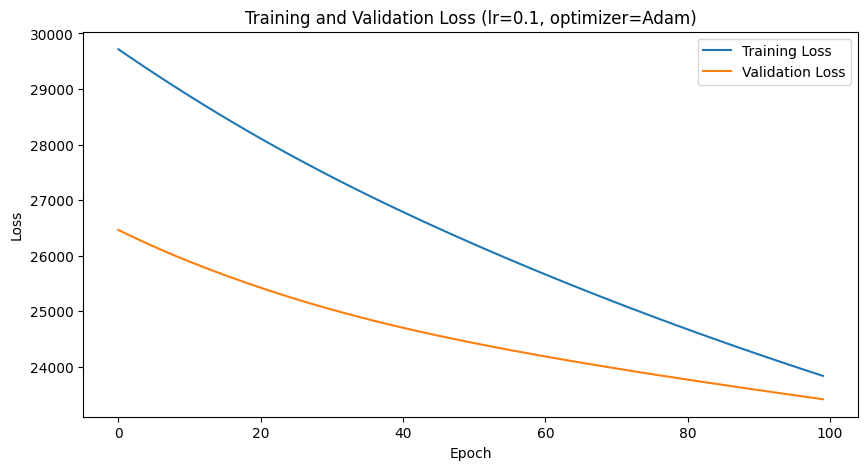

For lr=0.1 and optimizer=Adam, final training loss: 23835.80078125, final validation loss: 23415.783203125


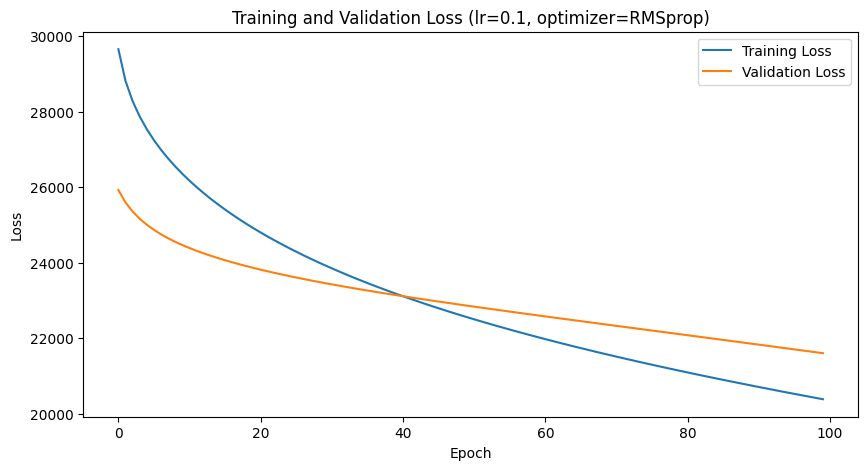

For lr=0.1 and optimizer=RMSprop, final training loss: 20378.642578125, final validation loss: 21598.58203125


In [ ]:
for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Linear(10,1)

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        writer = SummaryWriter(f'logs/lr_{lr}_optimizer_{optimizer_fn.__name__}')

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

            writer.add_scalar('Loss/train', loss, epoch)

            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                val_output = model(X_val)
                val_loss = criterion(val_output, y_val.view(-1, 1))

            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

        writer.close()

        # Plot training and validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
        plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(f'Training and Validation Loss (lr={lr}, optimizer={optimizer_fn.__name__})')
        plt.show()

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"final training loss: {train_losses[-1]}, "
              f"final validation loss: {val_losses[-1]}")

        train_losses.clear()
        val_losses.clear()

In [ ]:
# Lists to store MSE and MAE
mse_list = []
mae_list = []

for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Linear(10,1)

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_output = model(X_val)
            mse = nn.MSELoss()(val_output, y_val.view(-1, 1))
            mae = nn.L1Loss()(val_output, y_val.view(-1, 1))

        mse_list.append(mse.item())
        mae_list.append(mae.item())

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"MSE: {mse.item()}, MAE: {mae.item()}")

# Print MSE and MAE for each combination of lr and optimizer
for i, (lr, optimizer) in enumerate(zip(lr_list, optimizers)):
    print(f"Learning Rate: {lr}, Optimizer: {optimizer.__name__}")
    print(f"MSE: {mse_list[i]}, MAE: {mae_list[i]}")

# Find the best model based on MSE
best_model_index = np.argmin(mse_list)
best_lr_index = best_model_index // len(optimizers)
best_optimizer_index = best_model_index % len(optimizers)

best_lr = lr_list[best_lr_index]
best_optimizer = optimizers[best_optimizer_index]

print(f"The best model has learning rate={best_lr} and optimizer={best_optimizer.__name__}")

For lr=0.001 and optimizer=SGD, MSE: 18384.15234375, MAE: 121.99824523925781
For lr=0.001 and optimizer=Adam, MSE: 26445.197265625, MAE: 145.80857849121094
For lr=0.001 and optimizer=RMSprop, MSE: 26410.224609375, MAE: 145.47177124023438
For lr=0.01 and optimizer=SGD, MSE: 3478.22265625, MAE: 47.32157516479492
For lr=0.01 and optimizer=Adam, MSE: 26083.34765625, MAE: 145.65170288085938
For lr=0.01 and optimizer=RMSprop, MSE: 25600.962890625, MAE: 145.27227783203125
For lr=0.1 and optimizer=SGD, MSE: 2885.758544921875, MAE: 42.881797790527344
For lr=0.1 and optimizer=Adam, MSE: 23500.046875, MAE: 142.10247802734375
For lr=0.1 and optimizer=RMSprop, MSE: 21669.046875, MAE: 136.19578552246094
Learning Rate: 0.001, Optimizer: SGD
MSE: 18384.15234375, MAE: 121.99824523925781
Learning Rate: 0.01, Optimizer: Adam
MSE: 26445.197265625, MAE: 145.80857849121094
Learning Rate: 0.1, Optimizer: RMSprop
MSE: 26410.224609375, MAE: 145.47177124023438
The best model has learning rate=0.1 and optimizer=

# DNN MODEL

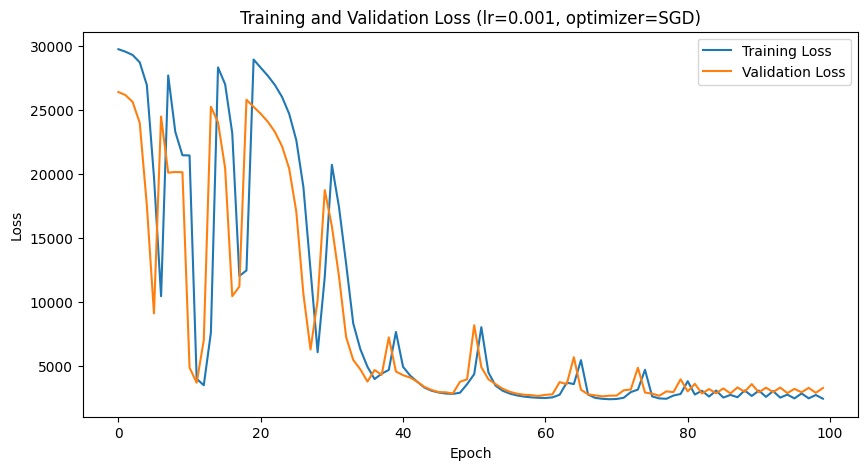

For lr=0.001 and optimizer=SGD, final training loss: 2404.558837890625, final validation loss: 3240.9599609375


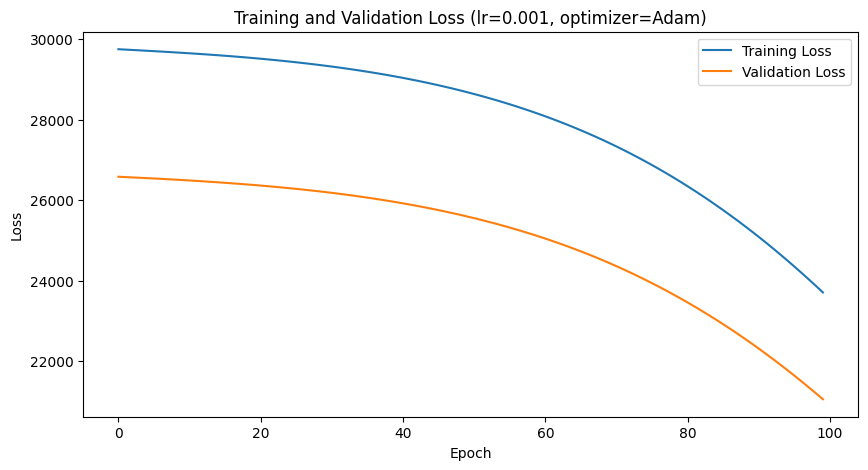

For lr=0.001 and optimizer=Adam, final training loss: 23711.1171875, final validation loss: 21057.96875


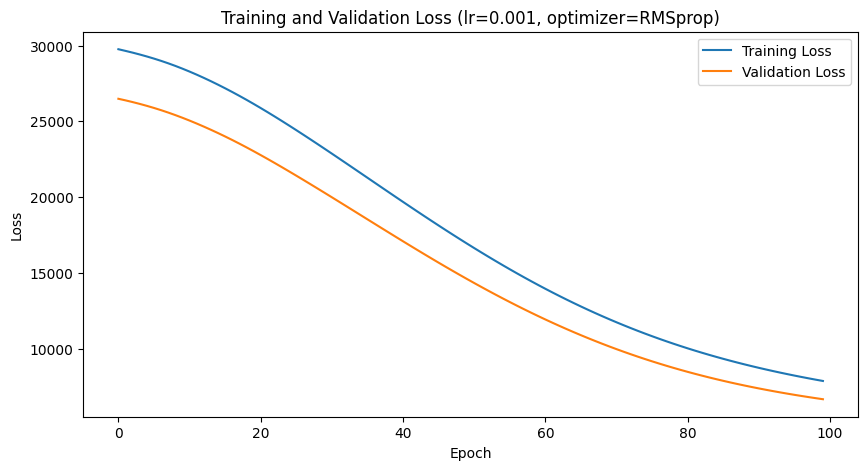

For lr=0.001 and optimizer=RMSprop, final training loss: 7891.4404296875, final validation loss: 6688.51806640625


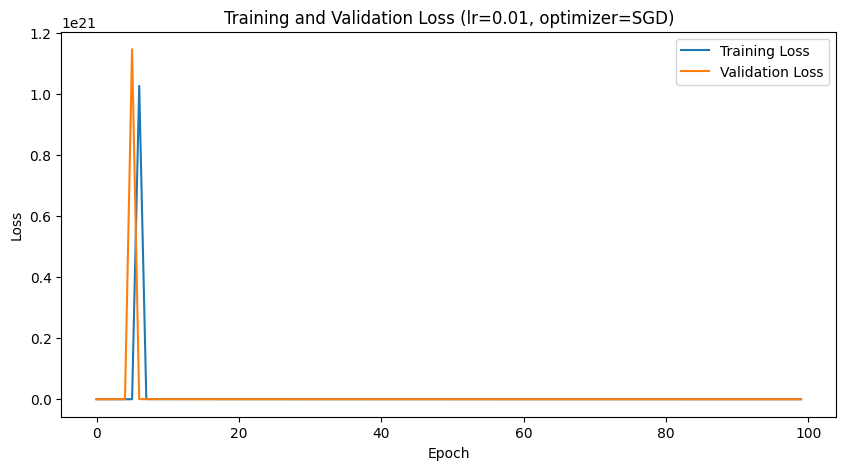

For lr=0.01 and optimizer=SGD, final training loss: 6828628096581632.0, final validation loss: 6558213197529088.0


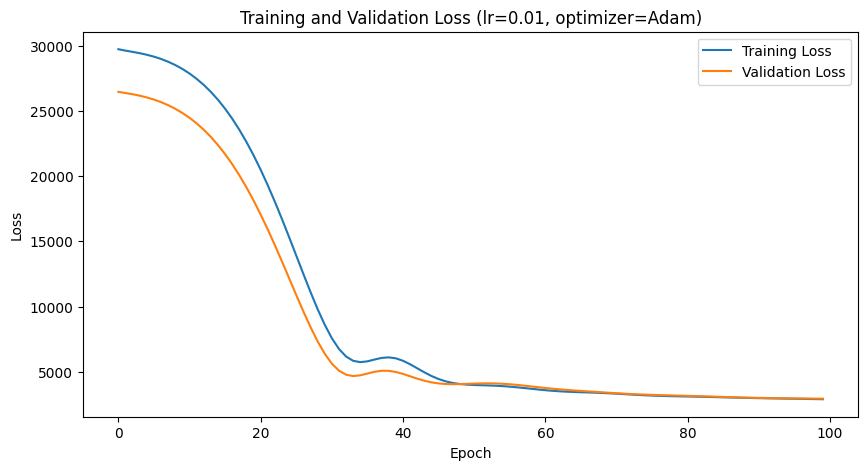

For lr=0.01 and optimizer=Adam, final training loss: 2904.5634765625, final validation loss: 2945.9345703125


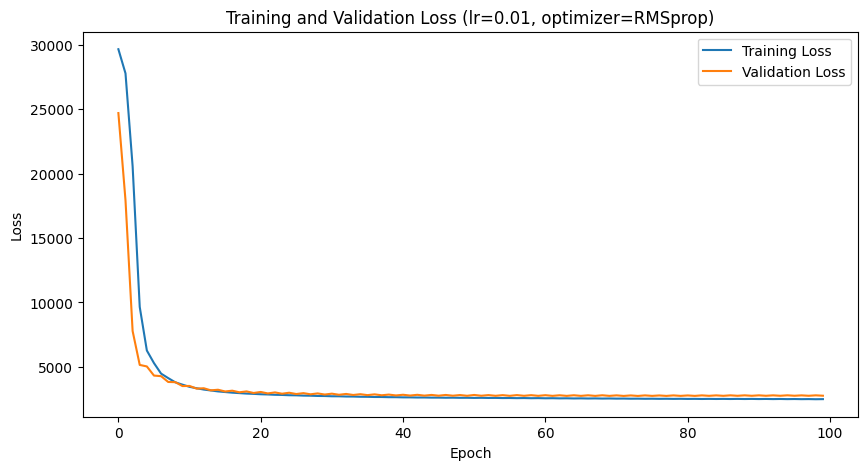

For lr=0.01 and optimizer=RMSprop, final training loss: 2487.52490234375, final validation loss: 2752.134033203125


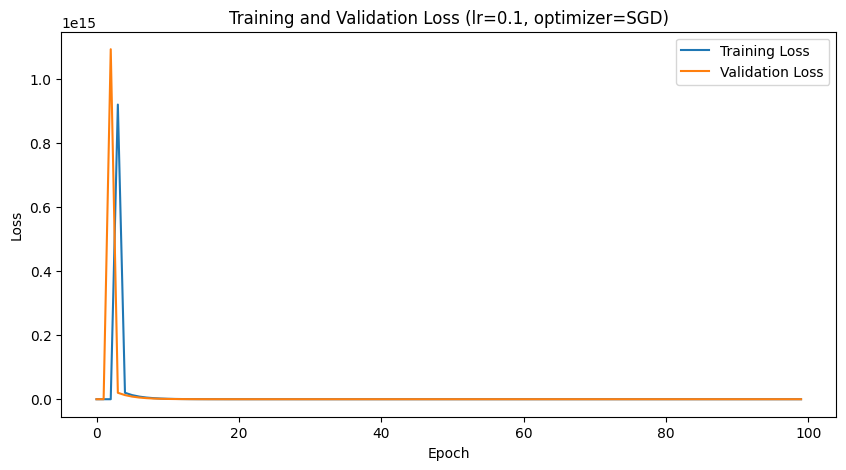

For lr=0.1 and optimizer=SGD, final training loss: 6076.3974609375, final validation loss: 5361.498046875


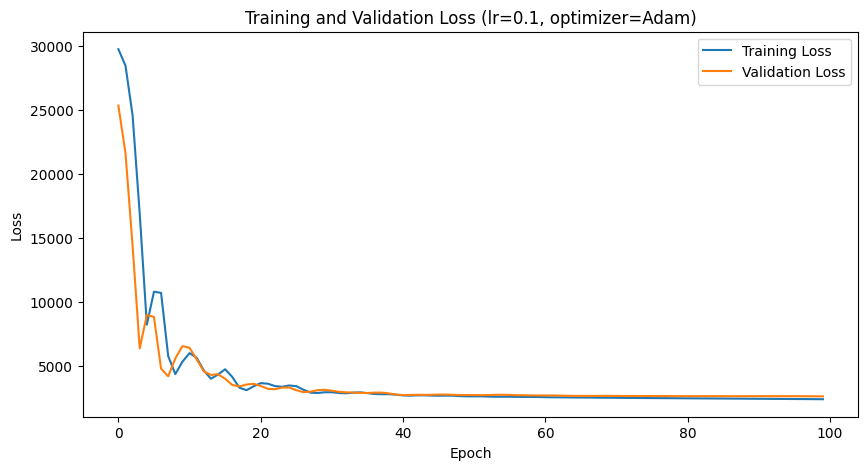

For lr=0.1 and optimizer=Adam, final training loss: 2379.814453125, final validation loss: 2603.802734375


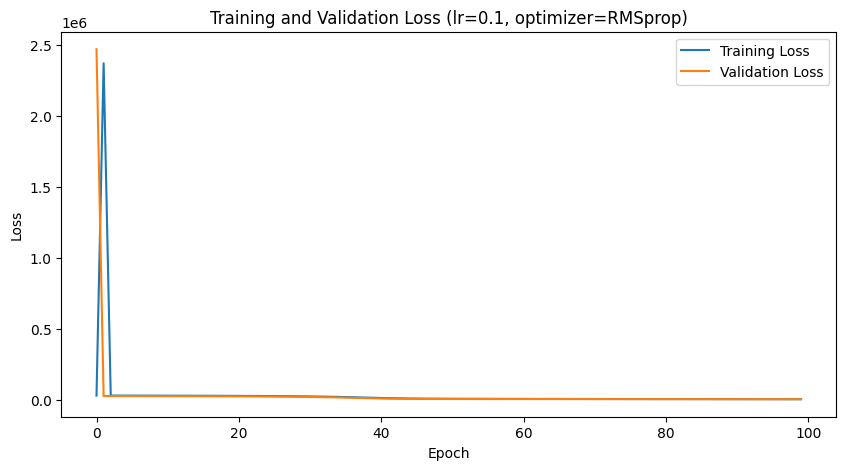

For lr=0.1 and optimizer=RMSprop, final training loss: 3871.5205078125, final validation loss: 4112.6416015625


In [ ]:
for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Sequential(
                nn.Linear(10, 64),
                nn.ReLU(),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1)
)

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        writer = SummaryWriter(f'logs/lr_{lr}_optimizer_{optimizer_fn.__name__}')

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

            writer.add_scalar('Loss/train', loss, epoch)

            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                val_output = model(X_val)
                val_loss = criterion(val_output, y_val.view(-1, 1))

            train_losses.append(loss.item())
            val_losses.append(val_loss.item())

        writer.close()

        # Plot training and validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
        plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(f'Training and Validation Loss (lr={lr}, optimizer={optimizer_fn.__name__})')
        plt.show()

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"final training loss: {train_losses[-1]}, "
              f"final validation loss: {val_losses[-1]}")

        train_losses.clear()
        val_losses.clear()

In [ ]:
# Lists to store MSE and MAE
mse_list = []
mae_list = []

for lr in lr_list:
    for optimizer_fn in optimizers:
        model = nn.Sequential(
                nn.Linear(10, 64),
                nn.ReLU(),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Linear(32, 1)
)

        model.train()  # Set the model to training mode

        optimizer = optimizer_fn(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        for epoch in range(100):
            optimizer.zero_grad()
            output = model(X_train)
            loss = criterion(output, y_train.view(-1, 1))
            loss.backward()
            optimizer.step()

        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_output = model(X_val)
            mse = nn.MSELoss()(val_output, y_val.view(-1, 1))
            mae = nn.L1Loss()(val_output, y_val.view(-1, 1))

        mse_list.append(mse.item())
        mae_list.append(mae.item())

        print(f"For lr={lr} and optimizer={optimizer_fn.__name__}, "
              f"MSE: {mse.item()}, MAE: {mae.item()}")

# Print MSE and MAE for each combination of lr and optimizer
for i, (lr, optimizer) in enumerate(zip(lr_list, optimizers)):
    print(f"Learning Rate: {lr}, Optimizer: {optimizer.__name__}")
    print(f"MSE: {mse_list[i]}, MAE: {mae_list[i]}")

# Find the best model based on MSE
best_model_index = np.argmin(mse_list)
best_lr_index = best_model_index // len(optimizers)
best_optimizer_index = best_model_index % len(optimizers)

best_lr = lr_list[best_lr_index]
best_optimizer = optimizers[best_optimizer_index]

print(f"The best model has learning rate={best_lr} and optimizer={best_optimizer.__name__}")

For lr=0.001 and optimizer=SGD, MSE: 7842.283203125, MAE: 71.89610290527344
For lr=0.001 and optimizer=Adam, MSE: 22593.849609375, MAE: 132.9656219482422
For lr=0.001 and optimizer=RMSprop, MSE: 5782.2841796875, MAE: 57.164249420166016
For lr=0.01 and optimizer=SGD, MSE: nan, MAE: nan
For lr=0.01 and optimizer=Adam, MSE: 3108.460693359375, MAE: 45.98386001586914
For lr=0.01 and optimizer=RMSprop, MSE: 2783.15283203125, MAE: 41.80400848388672
For lr=0.1 and optimizer=SGD, MSE: 5338.90576171875, MAE: 63.79495620727539
For lr=0.1 and optimizer=Adam, MSE: 2622.14794921875, MAE: 39.86835479736328
For lr=0.1 and optimizer=RMSprop, MSE: 5623.591796875, MAE: 56.8997802734375
Learning Rate: 0.001, Optimizer: SGD
MSE: 7842.283203125, MAE: 71.89610290527344
Learning Rate: 0.01, Optimizer: Adam
MSE: 22593.849609375, MAE: 132.9656219482422
Learning Rate: 0.1, Optimizer: RMSprop
MSE: 5782.2841796875, MAE: 57.164249420166016
The best model has learning rate=0.01 and optimizer=SGD
